# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (optimize for number of positions)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
pos = range(1, 10)
pos = [str(p) for p in pos]

Run Strategy

In [6]:
strategies = pd.Series()
for p in pos:
    print("{0}".format(p), end=" ")
    strategies[p] = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=int(p))
    strategies[p].run()
    _, strategies[p].tlog, strategies[p].dbal = strategies[p].get_logs(merge_trades=True)
    strategies[p].stats = strategies[p].get_stats()

1 2 3 4 5 6 7 8 9 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,1,2,3,4,5,6,7,8,9
annual_return_rate,5.26,4.70,4.51,4.12,3.66,3.11,2.71,2.39,2.13
max_closed_out_drawdown,-14.65,-14.58,-13.64,-13.38,-10.66,-9.44,-8.87,-7.76,-6.91
drawdown_annualized_return,-2.78,-3.10,-3.03,-3.25,-2.91,-3.04,-3.27,-3.24,-3.25
drawdown_recovery,-1.84,-1.78,-0.05,-0.05,-0.05,-0.07,-0.07,-0.07,-0.07
best_month,12.27,10.66,8.14,7.39,6.12,6.13,6.13,5.26,4.66
worst_month,-13.52,-13.30,-12.84,-12.41,-9.87,-8.14,-7.49,-6.54,-5.82
sharpe_ratio,0.59,0.58,0.62,0.64,0.65,0.64,0.63,0.64,0.64
sortino_ratio,0.42,0.39,0.41,0.41,0.42,0.40,0.40,0.40,0.41
monthly_std,1.93,1.69,1.48,1.26,1.07,0.93,0.81,0.71,0.62
pct_time_in_market,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.60


Bar graphs

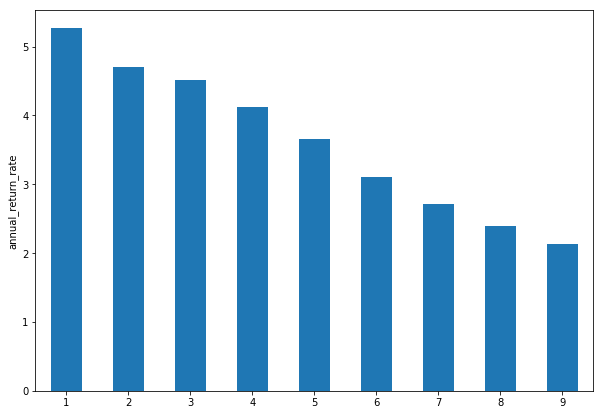

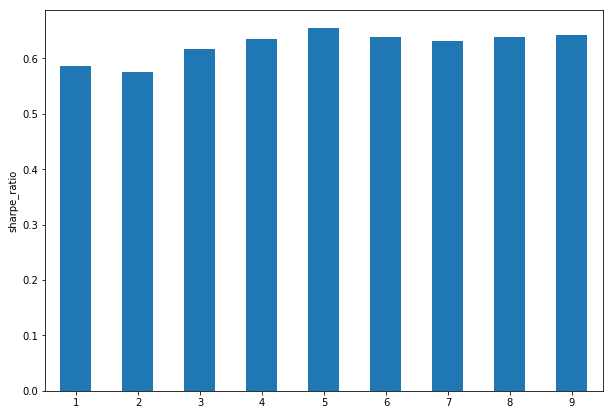

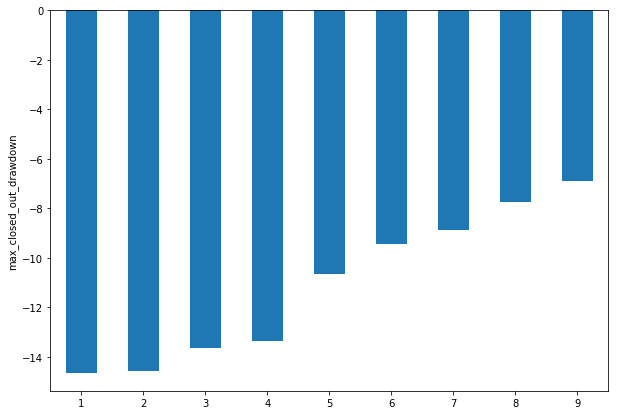

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[pos[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2019-12-19 00:00:00 SELL 68 SPY @ 320.90


Equity curve

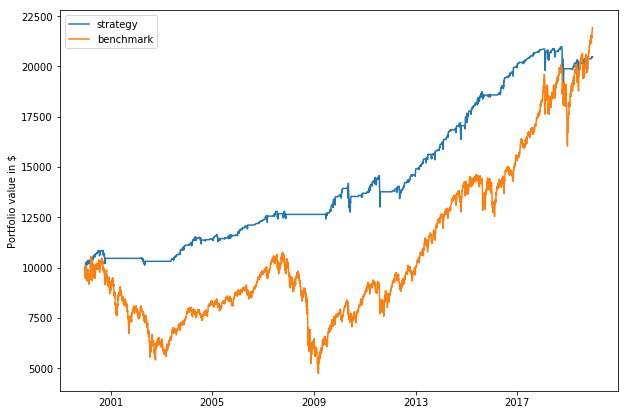

In [10]:
pf.plot_equity_curve(strategies['5'].dbal, benchmark=benchmark.dbal)